# `microdf` charts

## Setup

In [1]:
import numpy as np
import pandas as pd

import taxcalc as tc
import microdf as mdf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('white')
DPI = 500
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.

In [3]:
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

GRID_COLOR = '#eeeeee'  # Previously lighter #f5f5f5.

# Use Seaborn's default color palette.
# https://stackoverflow.com/q/48958426/1840471 for reproducibility.
sns.set_palette(sns.color_palette())

## Prepare data

In [4]:
base = mdf.calc_df(group_vars=['expanded_income', 'MARS'],
                   metric_vars=['aftertax_income', 'XTOT'])

In [5]:
reform = base.copy(deep=True)
UBI_PP = 10000
reform['ubi'] = reform.XTOT * UBI_PP
reform['aftertax_income'] = reform.aftertax_income + reform.ubi
mdf.add_weighted_metrics(reform, 'aftertax_income')

## Charts

#### Change to income percentiles

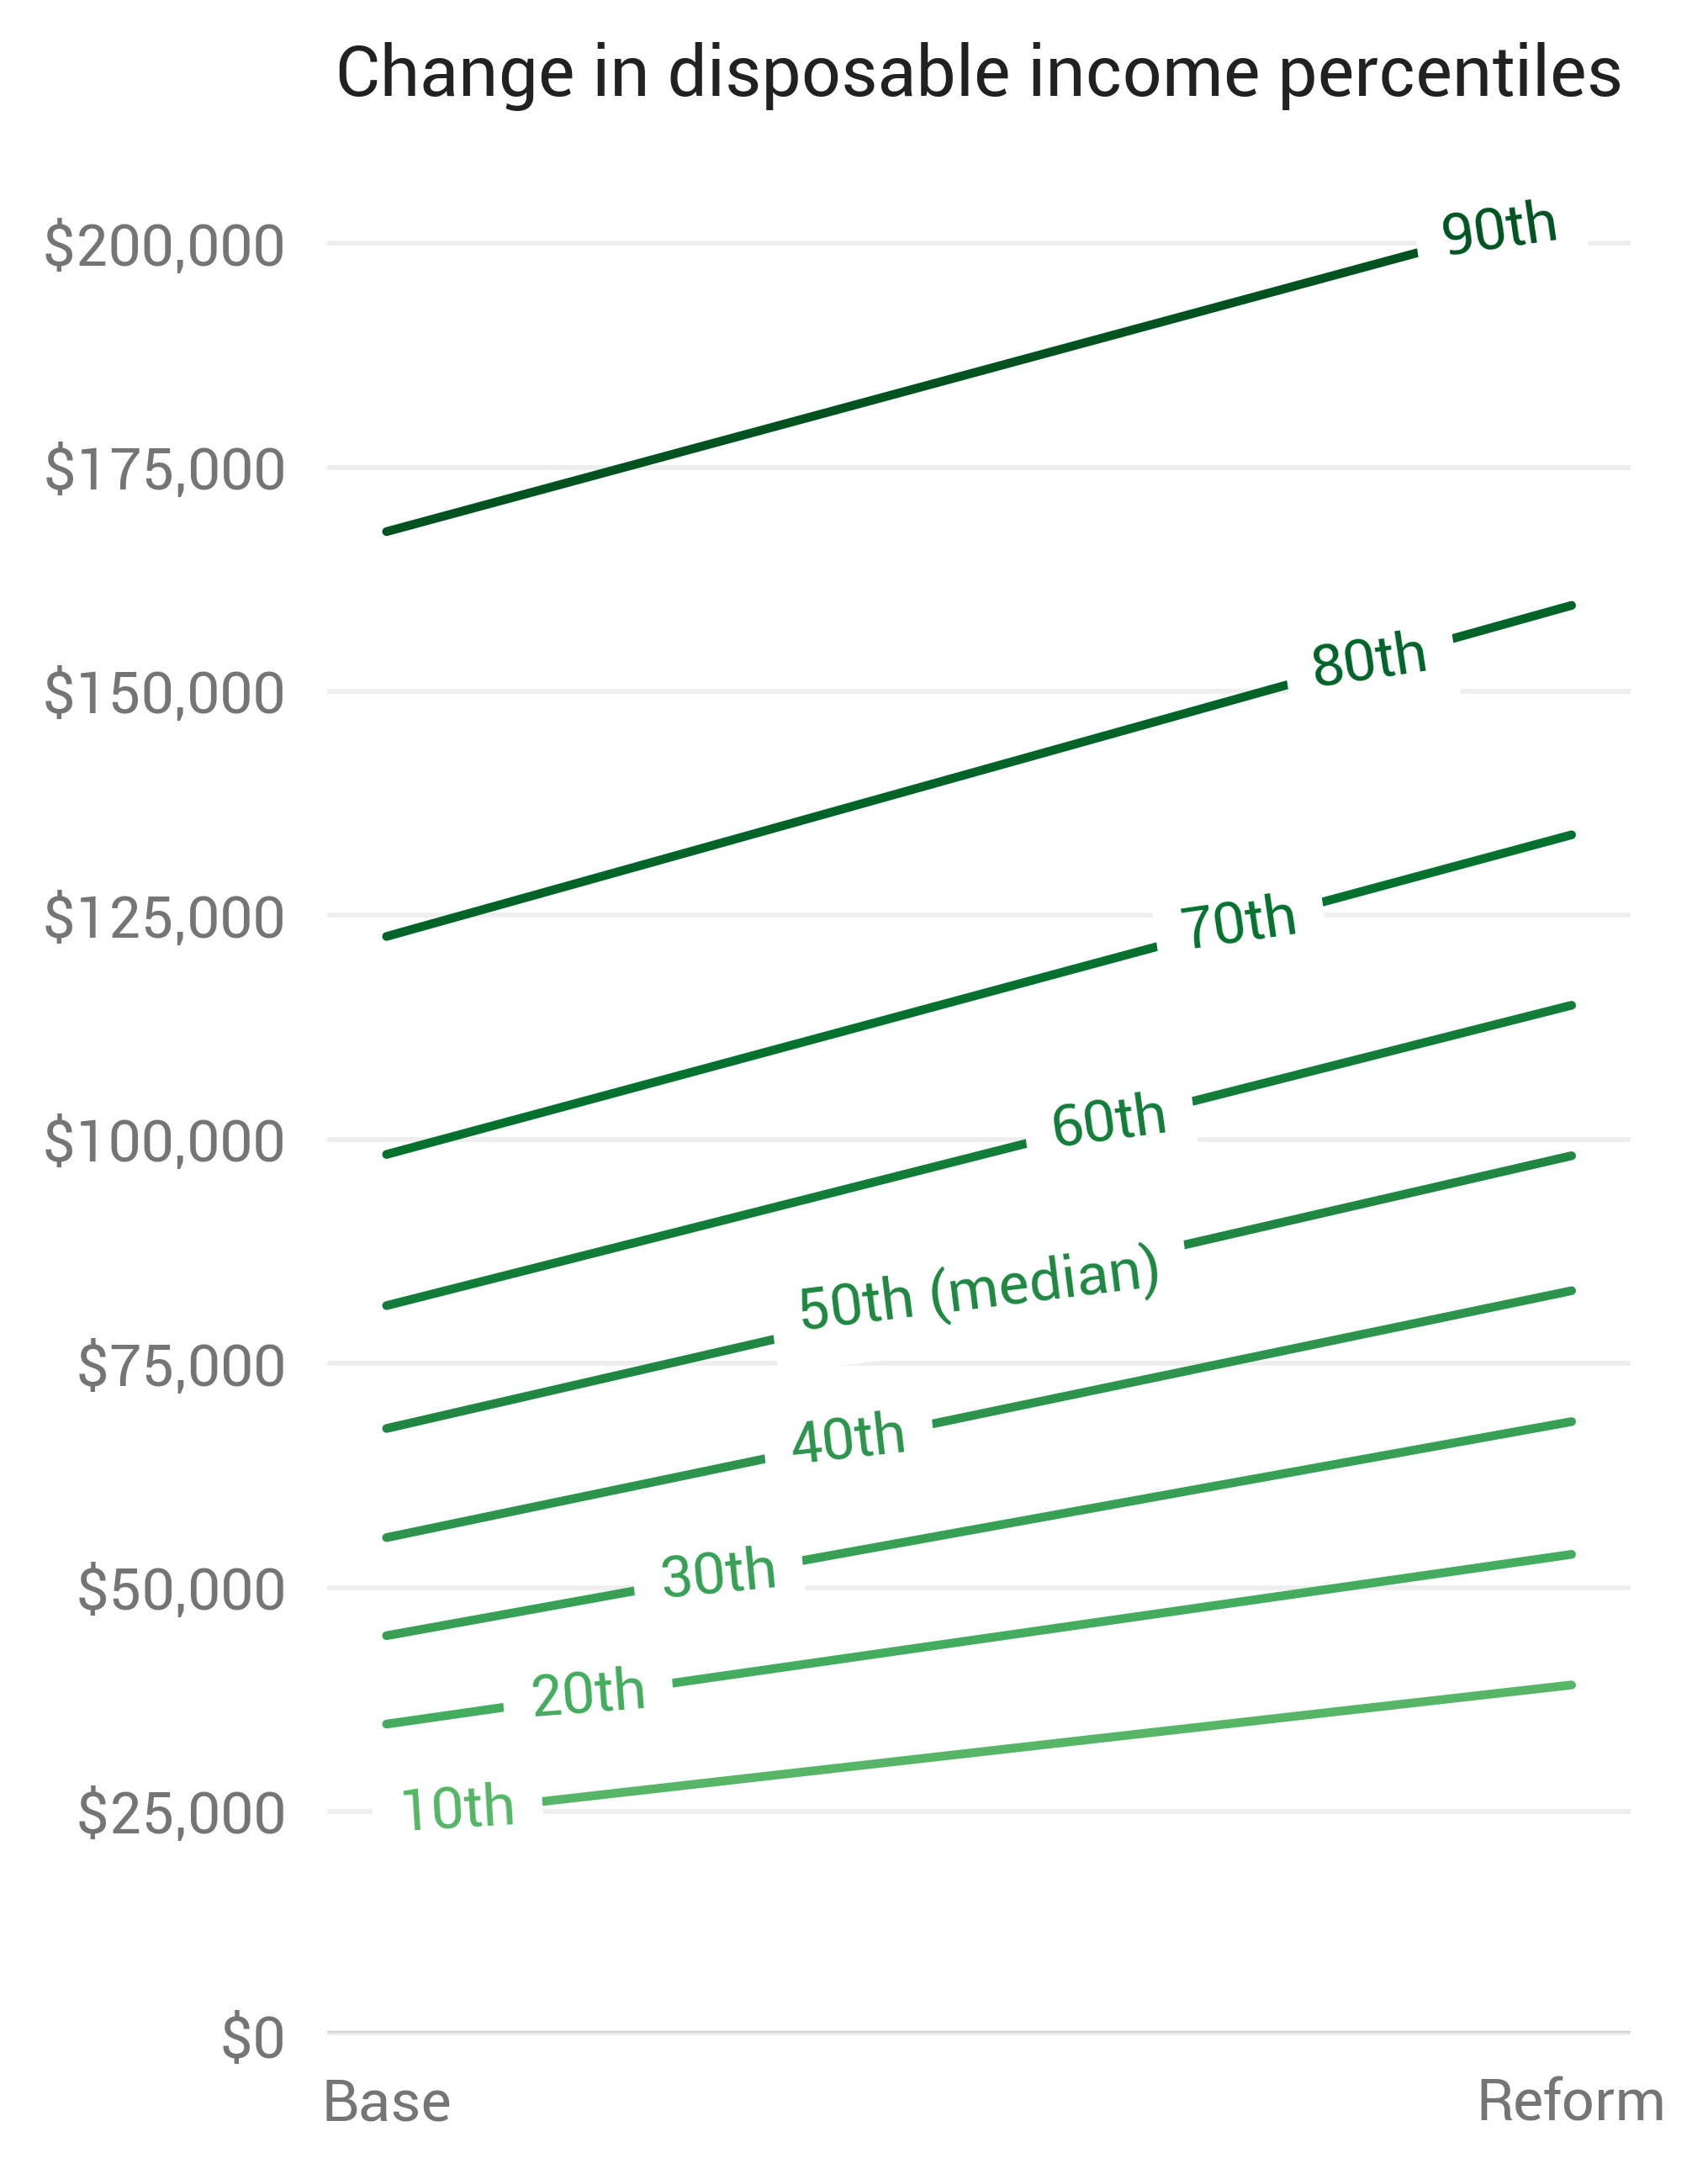

In [6]:
ax = mdf.quantile_chg_plot(base.aftertax_income, reform.aftertax_income,
                           base.XTOT_m, reform.XTOT_m)